['image', 'label']
(512, 512) (512, 512)


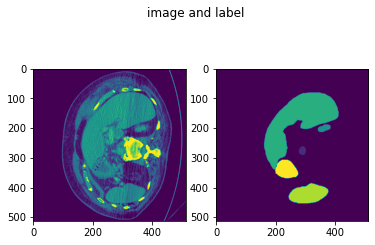

In [36]:
import numpy as np
import matplotlib.pyplot as plt

npz_data = np.load("data\\Synapse\\train_npz\\case0007_slice111.npz")
print(npz_data.files)
image = npz_data['image']
label = npz_data['label']
print(image.shape, label.shape)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('image and label')
ax1.imshow(image)
ax2.imshow(label)



In [105]:
import h5py
hf3 = h5py.File('data\\Synapse\\test_vol_h5\\case0001.npy.h5', 'r')

In [108]:
list(hf3.keys())
test_images = hf3['image']
test_labels = hf3['label']

In [109]:
test_images

<HDF5 dataset "image": shape (147, 512, 512), type "<f4">

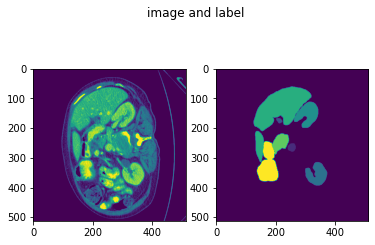

In [54]:
index = 100
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('image and label')
ax1.imshow(test_images[index])
ax2.imshow(test_labels[index])

In [78]:
uni_test_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_test_AIS_CONTRAST2_thesis.npy")
uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_test_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_test_504x1080x1080x1_W_DISCARDED.npy")


(1080, 1080, 1) (1080, 1080, 1) (1080, 1080, 1)


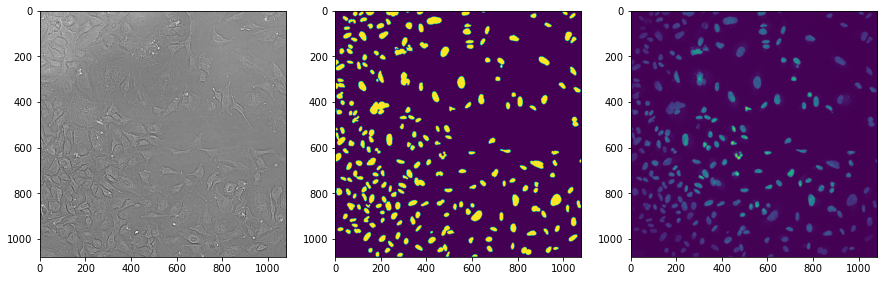

In [93]:
idx = 20
print(uni_test_data_bri[idx].shape,uni_test_data_flo[idx].shape, uni_test_label[idx].shape)
image_bri = uni_test_data_bri[idx]
image_flo = uni_test_data_flo[idx]
label = uni_test_label[idx]

fig, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(image_bri, cmap='gist_yarg')
ax2.imshow(image_flo)
ax3.imshow(label)
plt.show()

In [96]:
test_images.shape

(147, 512, 512)

In [3]:
!pip install nibabel

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from nibabel.testing import data_path

example_filename =  'tmp\\case0038_pred.nii.gz'

import nibabel as nib
img = nib.load(example_filename)



In [17]:
img.dataobj[:,:,0].shape

(512, 512)

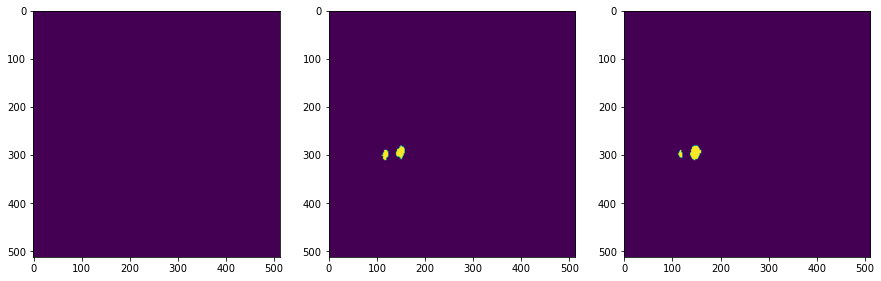

In [24]:


fig, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(img.dataobj[:,:,1])
ax2.imshow(img.dataobj[:,:,2])
ax3.imshow(img.dataobj[:,:,3])
plt.show()

In [25]:
uni_test_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_test_AIS_CONTRAST2_thesis.npy")
#uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_test_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_test_504x1080x1080x1_W_DISCARDED.npy")

In [31]:
uni_test_label[0].shape

(1080, 1080, 1)

In [77]:
#From university dataset create test images in npy.h5 format

file_path = 'University data\\prepared\\test_images.txt'
uni_test_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_test_AIS_CONTRAST2_thesis.npy")
#uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_test_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_test_504x1080x1080x1_W_DISCARDED.npy")
for i in np.arange(0,uni_test_data_bri.shape[0]):
    single_bri = uni_test_data_bri[i].reshape(1080,1080)
    single_label = uni_test_label[i].reshape(1080,1080)
    hf = h5py.File('University data\\prepared\\test\\image_'+str(i)+'.npy.h5', 'w')
    hf.create_dataset('image', data=single_bri.reshape(1,1080,1080))
    hf.create_dataset('label', data=single_label.reshape(1,1080,1080))
    hf.close()    
    with open(file_path,'a') as f:
        f.writelines('{}\n'.format('image_'+str(i)))

In [78]:
#From university dataset create training images

uni_train_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_train_AIS_CONTRAST2_thesis.npy")
#uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_train_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_train_2016x1080x1080x1_W_DISCARDED.npy")

for i in np.arange(0,uni_train_data_bri.shape[0]):
    single_bri = uni_train_data_bri[i].reshape(1080,1080)
    single_label = uni_train_label[i].reshape(1080,1080)
    np.savez_compressed('University data\\prepared\\train\\image_'+str(i)+'.npz', image=single_bri, label=single_label)

In [79]:
#From university dataset create training images

uni_val_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_val_AIS_CONTRAST2_thesis.npy")
#uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_val_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_val_504x1080x1080x1_W_DISCARDED.npy")

for i in np.arange(0,uni_val_data_bri.shape[0]):
    single_bri = uni_val_data_bri[i].reshape(1080,1080)
    single_label = uni_val_label[i].reshape(1080,1080)
    np.savez_compressed('University data\\prepared\\train\\image_val_'+str(i)+'.npz', image=single_bri, label=single_label)

In [80]:
#Create training images list

import os
import sys    
file_path = 'University data\\prepared\\train_images.txt'
img_path =  'University data\\prepared\\train\\'
with open(file_path,'w') as f:
        f.writelines(['{}\n'.format(os.path.splitext(line)[0]) for line in os.listdir(img_path)])

['image', 'label']
(1080, 1080) (1080, 1080)
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


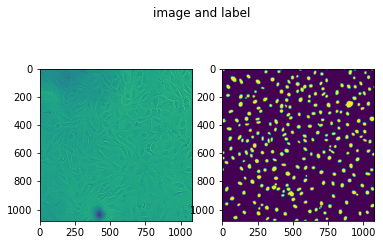

In [82]:
#validate training images

import numpy as np
import matplotlib.pyplot as plt

npz_data = np.load("University data\\prepared\\train\\image_0.npz")
print(npz_data.files)
image = npz_data['image']
label = npz_data['label']
print(image.shape, label.shape)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('image and label')
ax1.imshow(image)
ax2.imshow(label)

print(label)


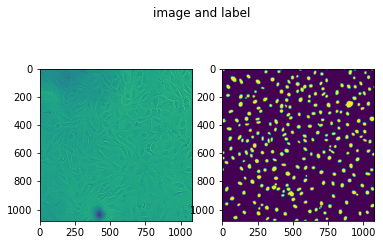

In [98]:
#validate test images

import h5py
hf = h5py.File('data\\University_dev\\test_vol_h5\\image_0.npy.h5', 'r')

list(hf.keys())
test_images = hf['image']
test_labels = hf['label']

index = 0
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('image and label')
ax1.imshow(test_images[index])
ax2.imshow(test_labels[index])

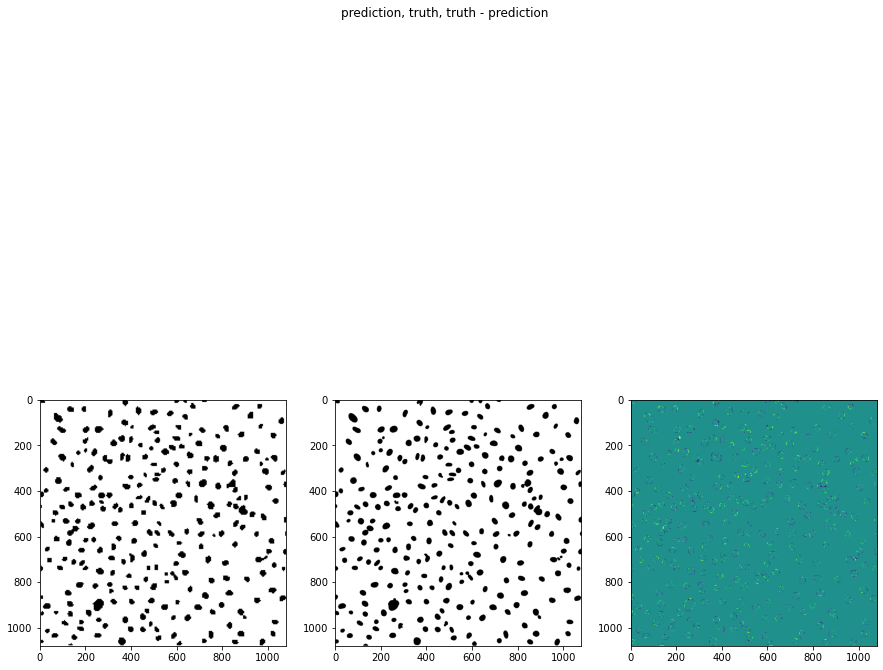

In [157]:
#Visualize sanity check prediction

import numpy as np
import matplotlib.pyplot as plt
import os
from nibabel.testing import data_path

indx = '0'
example_filename =  'predictions\\TU_University_dev224\TU_pretrain_R50-ViT-B_16_skip3_epo2000_bs24_224\\image_'+indx+'_pred.nii.gz'
example_filename2 =  'predictions\\TU_University_dev224\TU_pretrain_R50-ViT-B_16_skip3_epo2000_bs24_224\\image_'+indx+'_gt.nii.gz'
example_filename3 =  'predictions\\TU_University_dev224\TU_pretrain_R50-ViT-B_16_skip3_epo2000_bs24_224\\image_'+indx+'_img.nii.gz'


import nibabel as nib
img = nib.load(example_filename)
img2 = nib.load(example_filename2)
img3 = nib.load(example_filename3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,15))
fig.suptitle('prediction, truth, truth - prediction')
ax1.imshow(img.dataobj[:,:,0], cmap='gist_yarg')
ax2.imshow(img2.dataobj[:,:,0], cmap='gist_yarg')
ax3.imshow(img2.dataobj[:,:,0]-img.dataobj[:,:,0])

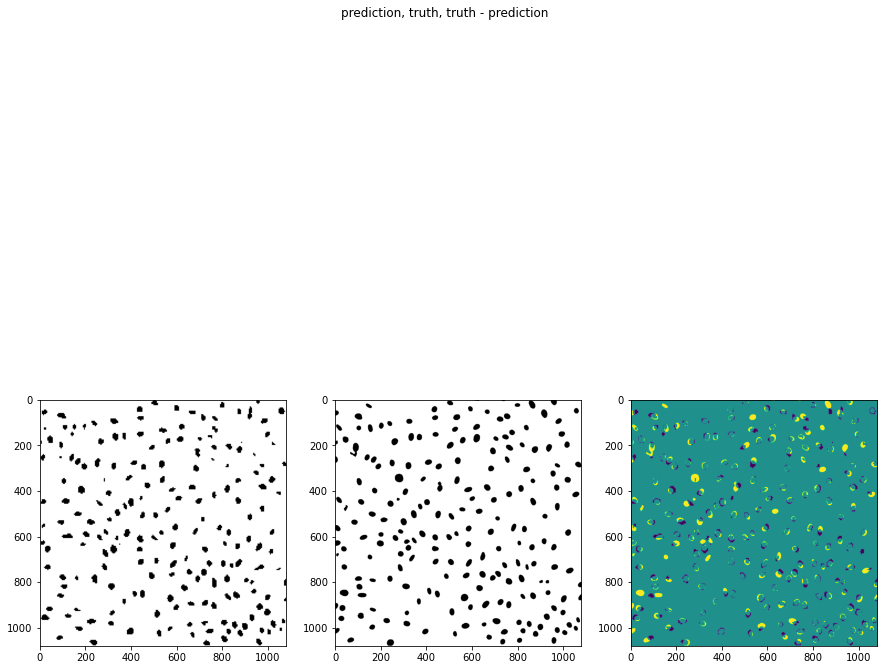

In [155]:
#Visualize prediction

import numpy as np
import matplotlib.pyplot as plt
import os
from nibabel.testing import data_path

indx = '101'
example_filename =  'predictions\\TU_University224\TU_pretrain_R50-ViT-B_16_skip3_epo150_bs24_224\\image_'+indx+'_pred.nii.gz'
example_filename2 =  'predictions\\TU_University224\TU_pretrain_R50-ViT-B_16_skip3_epo150_bs24_224\\image_'+indx+'_gt.nii.gz'
example_filename3 =  'predictions\\TU_University224\TU_pretrain_R50-ViT-B_16_skip3_epo150_bs24_224\\image_'+indx+'_img.nii.gz'


import nibabel as nib
img = nib.load(example_filename)
img2 = nib.load(example_filename2)
img3 = nib.load(example_filename3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,15))
fig.suptitle('prediction, truth, truth - prediction')
ax1.imshow(img.dataobj[:,:,0], cmap='gist_yarg')
ax2.imshow(img2.dataobj[:,:,0], cmap='gist_yarg')
ax3.imshow(img2.dataobj[:,:,0]-img.dataobj[:,:,0])

In [97]:
#Generated small dataset for sanity check (same for training and testing)

file_path = 'University data\\prepared\\test_images.txt'

uni_test_data_bri = np.load("University data\\Dataset\\Brightfield\\X_1080_train_AIS_CONTRAST2_thesis.npy")
#uni_test_data_flo = np.load("University data\\Dataset\\Fluorescent\\X_1080_test_FL_thesis.npy")
uni_test_label = np.load("University data\\Dataset\\Ground_Truth\\SCL_Y_train_2016x1080x1080x1_W_DISCARDED.npy")
 
for i in np.arange(0,5):
    single_bri = uni_test_data_bri[i].reshape(1080,1080)
    single_label = uni_test_label[i].reshape(1080,1080)
    hf = h5py.File('University data\\prepared\\test_limited\\image_'+str(i)+'.npy.h5', 'w')
    hf.create_dataset('image', data=single_bri.reshape(1,1080,1080))
    hf.create_dataset('label', data=single_label.reshape(1,1080,1080))
    hf.close()    